In [1]:
"""
# 🔧 Installation
# Install the transformers-attention-viz package from PyPI
"""
!pip install transformers-attention-viz -q
print("✅ Installation complete!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.1 MB/s eta 0:00:00
✅ Installation complete!


In [3]:
"""
# 📚 Import Required Libraries
"""
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Import visualization tools
from attention_viz import AttentionVisualizer
from transformers import (
    BlipProcessor,
    BlipForConditionalGeneration,
    CLIPModel,
    CLIPProcessor
)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [4]:
"""
# 🤖 Load Pre-trained Models
# We'll use BLIP for cross-modal attention visualization
"""
print("Loading BLIP model (this may take a minute)...")

# Load BLIP model and processor
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

# Create visualizer
visualizer = AttentionVisualizer(blip_model, blip_processor)

print("✅ Model loaded and ready!")

Loading BLIP model (this may take a minute)...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Found 36 attention modules in BLIP model
  - text_decoder.layer_0.self_attention
  - text_decoder.layer_0.cross_attention
  - text_decoder.layer_1.self_attention
  - text_decoder.layer_1.cross_attention
  - text_decoder.layer_2.self_attention
  ... and 31 more
✅ Model loaded and ready!


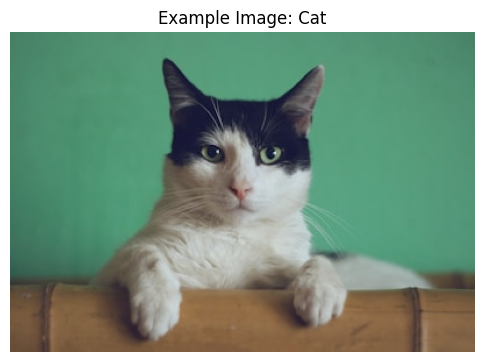

In [5]:
"""
# 🖼️ Load Example Image
# Let's use a cat image for demonstration
"""
# Load image from URL
image_url = "https://images.unsplash.com/photo-1514888286974-6c03e2ca1dba?w=400"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Example Image: Cat")
plt.axis('off')
plt.show()

Text: 'a fluffy orange cat sitting on a surface'

Generating cross-modal attention visualization...


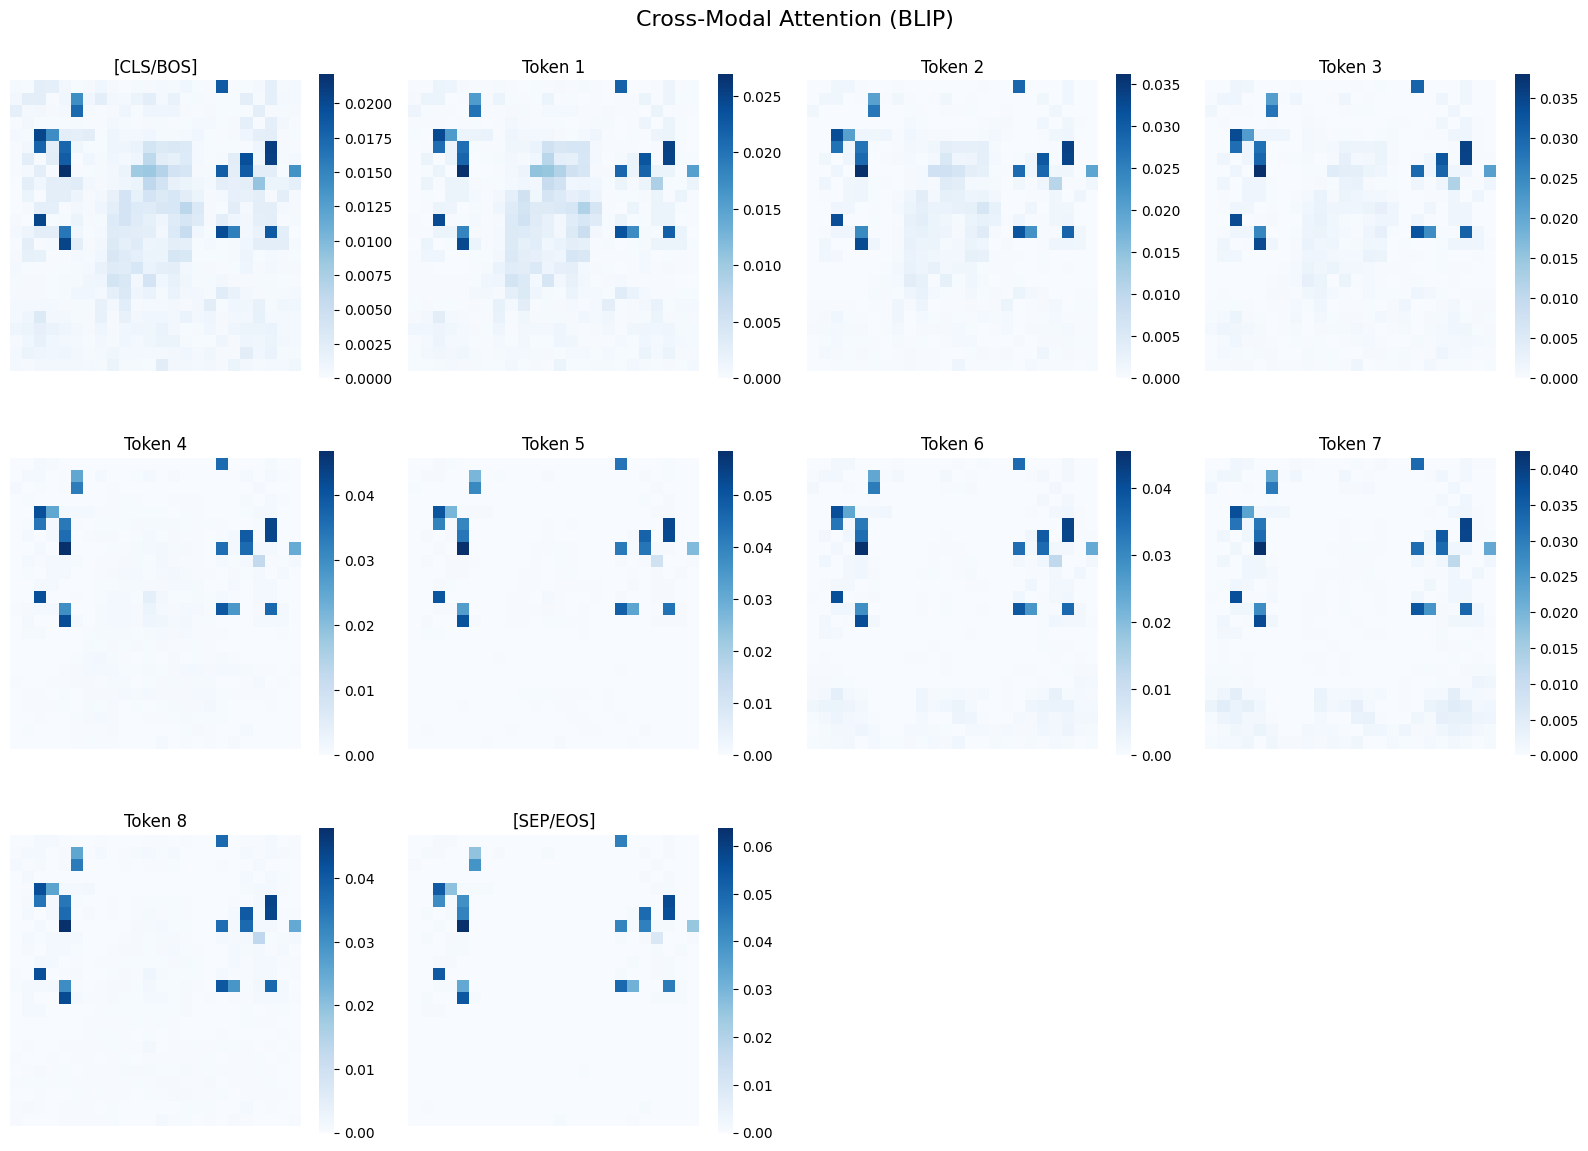


💡 Each subplot shows how one text token attends to the image patches


In [6]:
"""
# 🔍 Visualize Cross-Modal Attention
# This shows how text tokens attend to image regions
"""
# Define the text description
text = "a fluffy orange cat sitting on a surface"

print(f"Text: '{text}'")
print("\nGenerating cross-modal attention visualization...")

# Create visualization
viz = visualizer.visualize(
    image=image,
    text=text,
    visualization_type="heatmap",
    attention_type="cross"
)

# Display the visualization
viz.show()

print("\n💡 Each subplot shows how one text token attends to the image patches")

In [7]:
"""
# 📊 Analyze Attention Patterns
# Get quantitative metrics about the attention distribution
"""
# Calculate attention statistics
stats = visualizer.get_attention_stats(image, text, attention_type="cross")

print("📈 Attention Statistics:")
print(f"• Model type: {stats['model_type']}")
print(f"• Average entropy: {np.mean(stats['entropy']):.3f}")
print(f"• Attention concentration: {stats['concentration']:.3f}")
print(f"\n🎯 Top 5 most attended image regions:")
for i, (patch, score) in enumerate(stats['top_tokens'][:5]):
    print(f"  {i+1}. {patch}: {score:.4f}")

📈 Attention Statistics:
• Model type: BLIP
• Average entropy: 4.251
• Attention concentration: 0.888

🎯 Top 5 most attended image regions:
  1. Patch_(24,4): 0.0429
  2. Patch_(20,1): 0.0395
  3. Patch_(23,4): 0.0391
  4. Patch_(45,1): 0.0381
  5. Patch_(14,0): 0.0376


Comparing attention patterns for different descriptions:



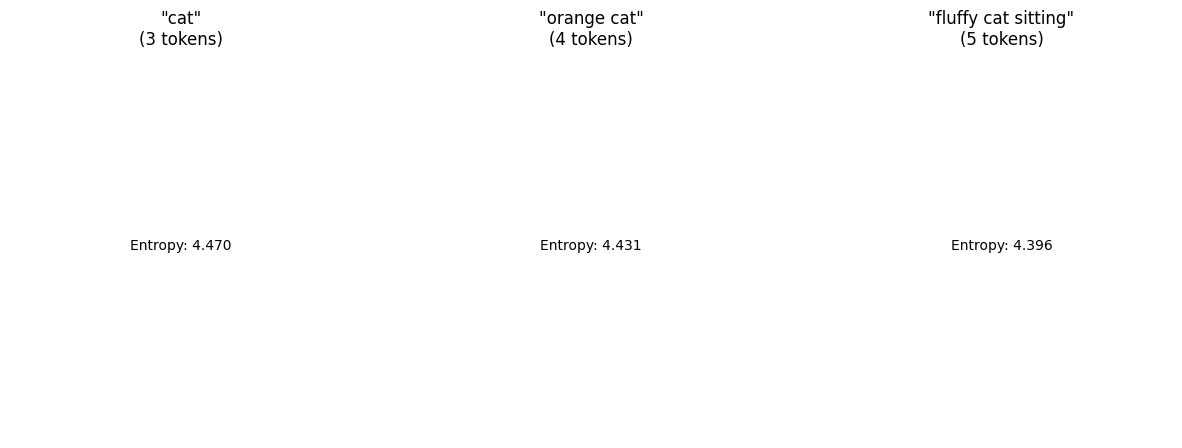

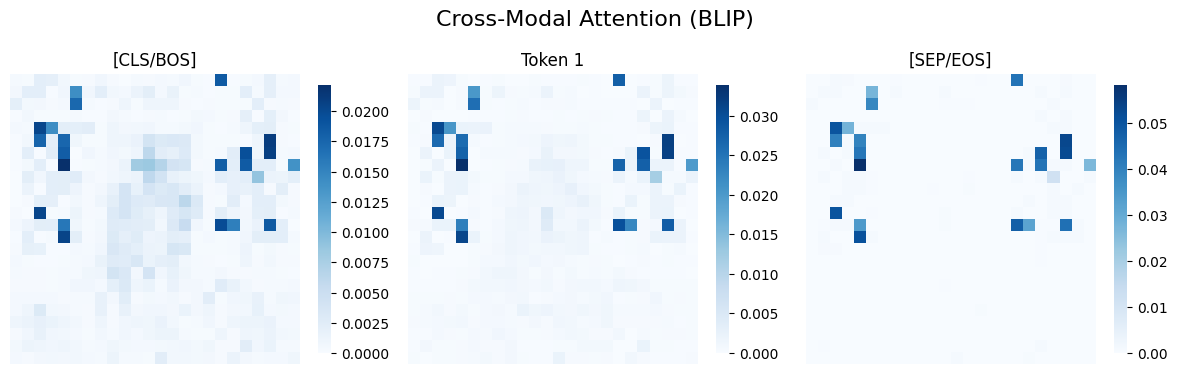

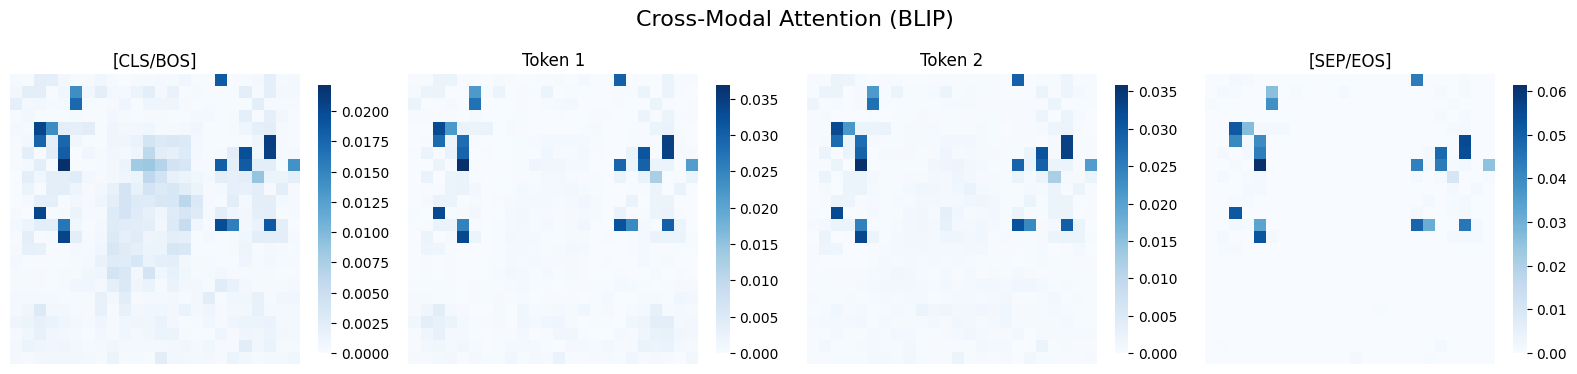

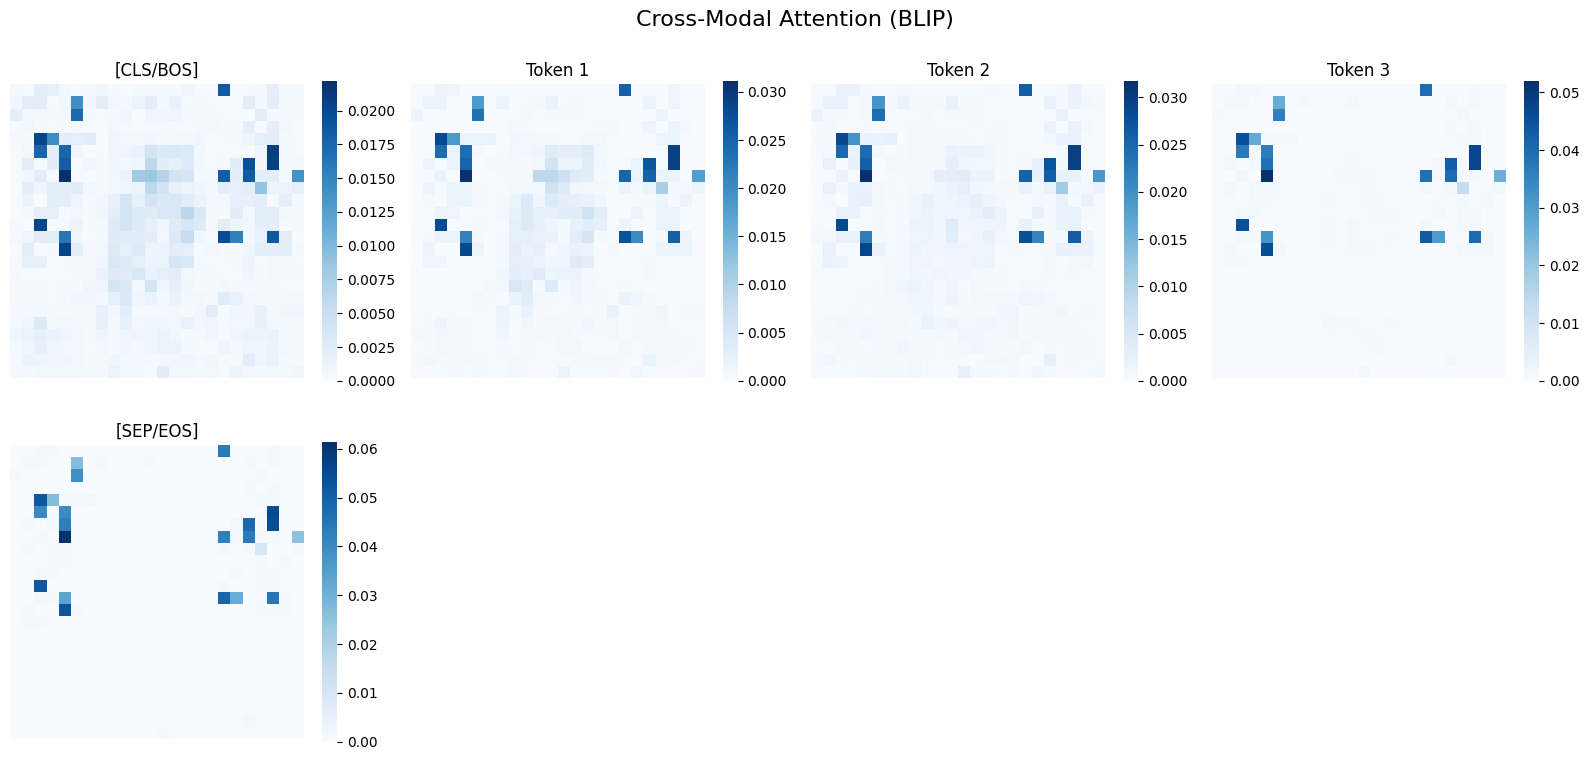

💡 Longer descriptions create more tokens and different attention patterns


In [8]:
"""
# 🔄 Compare Different Descriptions
# See how attention changes with different text
"""
# Test different descriptions
descriptions = [
    "cat",
    "orange cat",
    "fluffy cat sitting"
]

print("Comparing attention patterns for different descriptions:\n")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, desc in enumerate(descriptions):
    # Generate visualization
    viz = visualizer.visualize(
        image=image,
        text=desc,
        visualization_type="heatmap",
        attention_type="cross"
    )

    # For display, we'll show just the first content token's attention
    # (skipping CLS token)
    stats = visualizer.get_attention_stats(image, desc, attention_type="cross")

    # Create a simple heatmap for comparison
    axes[idx].set_title(f'"{desc}"\n({len(desc.split())+2} tokens)')
    axes[idx].text(0.5, 0.5, f"Entropy: {np.mean(stats['entropy']):.3f}",
                   ha='center', va='center', transform=axes[idx].transAxes)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("💡 Longer descriptions create more tokens and different attention patterns")

Visualizing attention at different layers...

📍 First Layer (Layer 0):
   Entropy: 4.201
   Top patch: ('Patch_(24,4)', np.float32(0.044342108))

📍 Middle Layer (Layer 5):
   Entropy: 3.612
   Top patch: ('Patch_(24,4)', np.float32(0.05769625))

📍 Last Layer (Layer 11):
   Entropy: 4.470
   Top patch: ('Patch_(24,4)', np.float32(0.038117975))



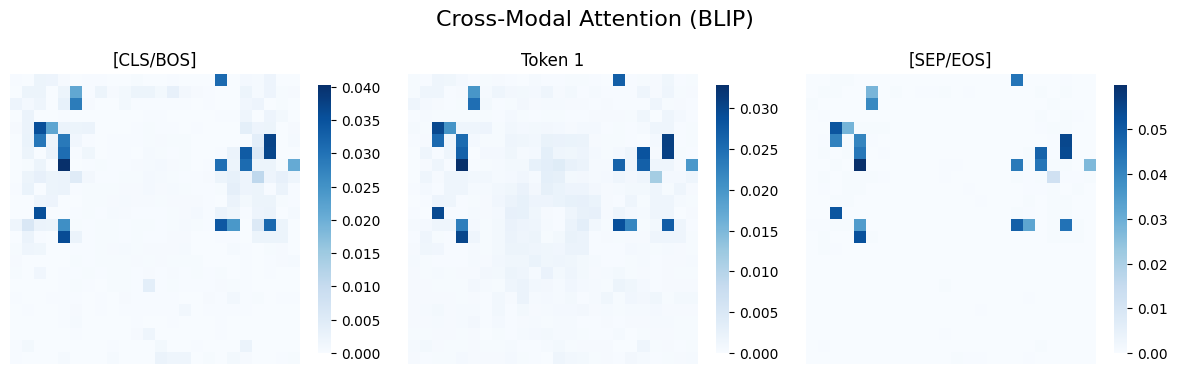

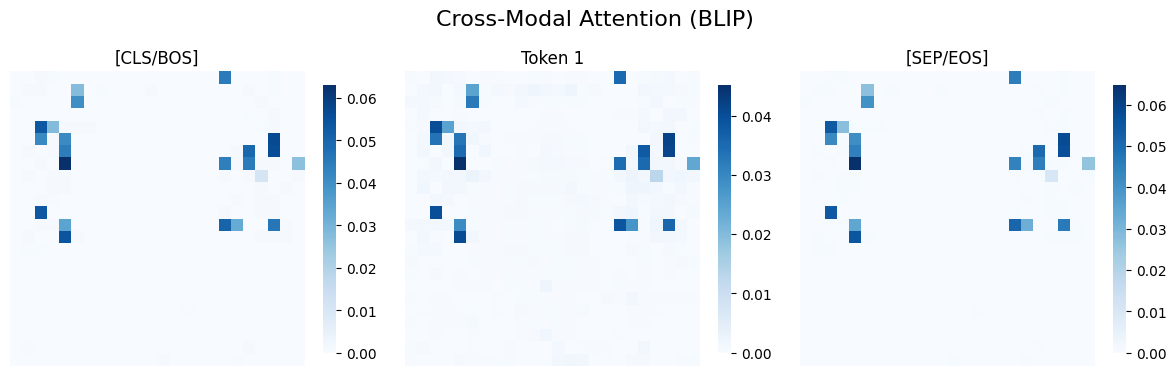

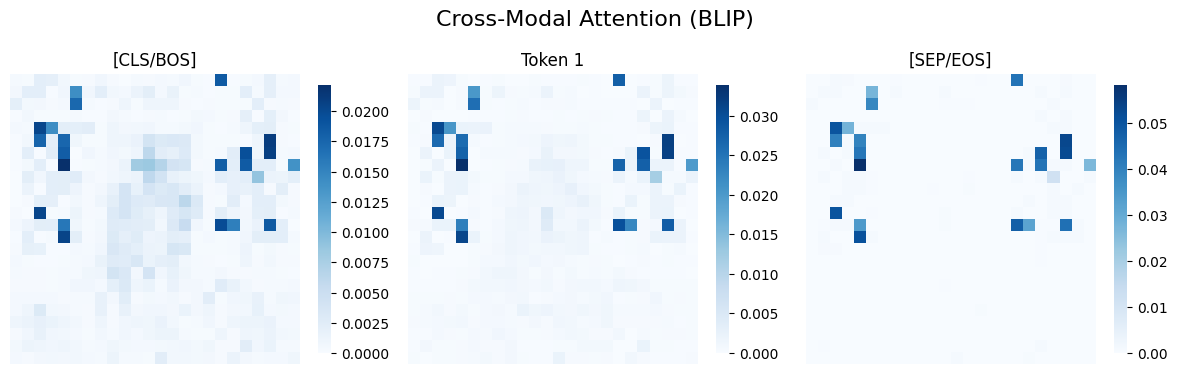

In [9]:
"""
# 🏗️ Analyze Different Transformer Layers
# Attention patterns evolve through the network layers
"""
print("Visualizing attention at different layers...\n")

# Visualize first, middle, and last layers
layer_indices = [0, 5, 11]
layer_names = ["First Layer", "Middle Layer", "Last Layer"]

for layer_idx, layer_name in zip(layer_indices, layer_names):
    print(f"📍 {layer_name} (Layer {layer_idx}):")

    viz = visualizer.visualize(
        image=image,
        text="cat",
        visualization_type="heatmap",
        attention_type="cross",
        layer_indices=[layer_idx]
    )

    # Get stats for this specific layer
    stats = visualizer.get_attention_stats(
        image, "cat",
        attention_type="cross",
        layer_index=layer_idx
    )

    print(f"   Entropy: {np.mean(stats['entropy']):.3f}")
    print(f"   Top patch: {stats['top_tokens'][0]}\n")

Generating attention evolution visualization...



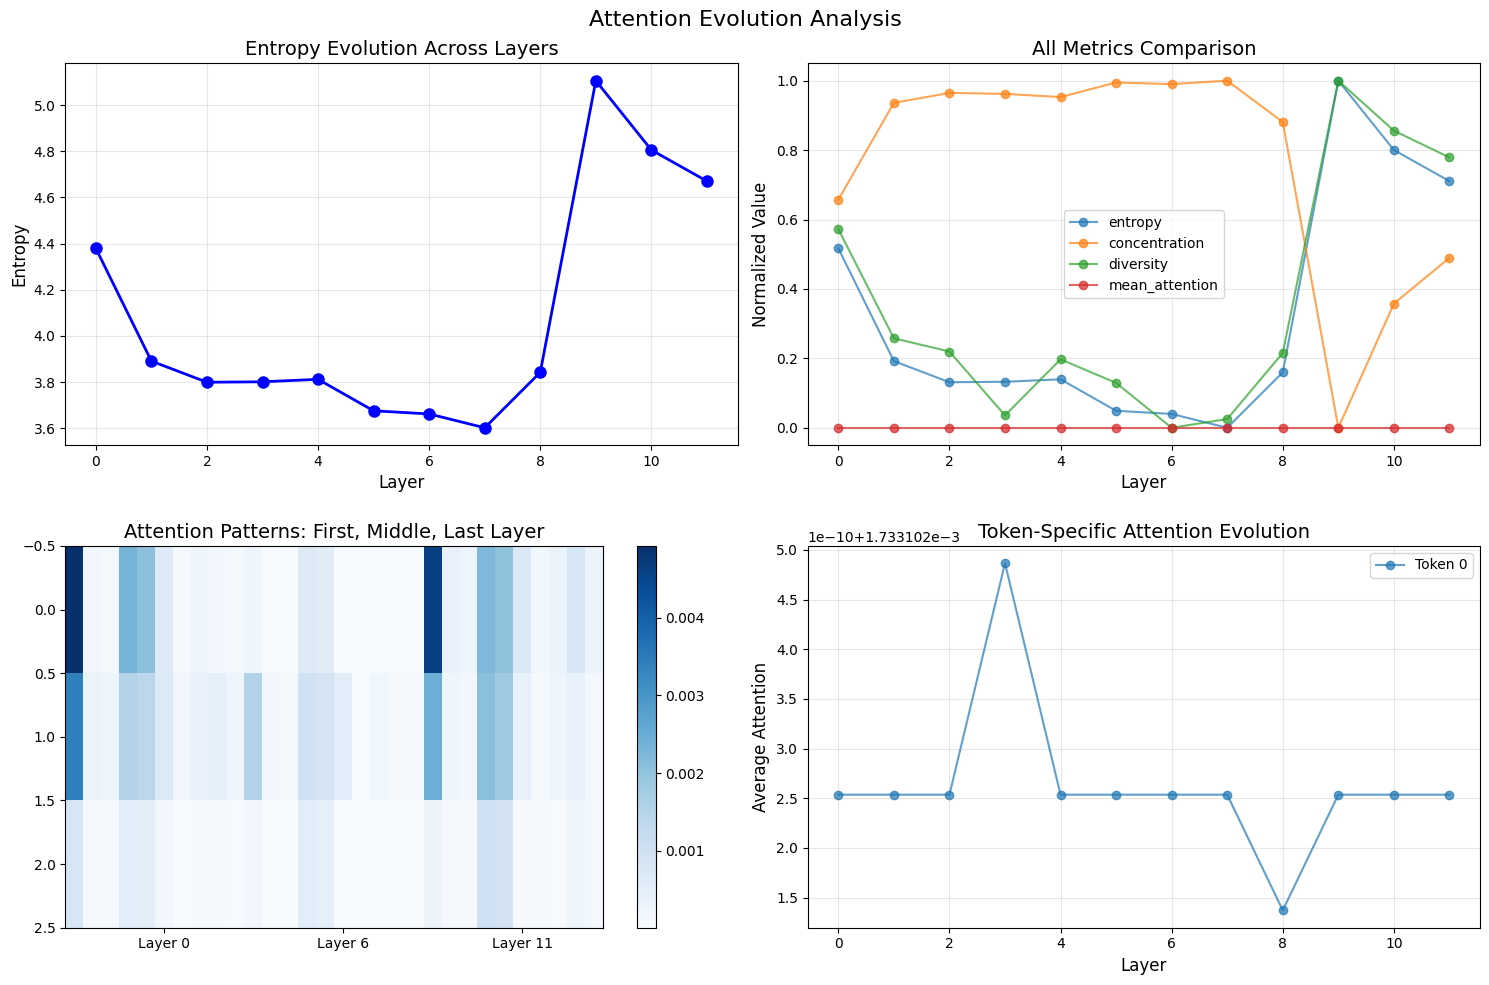

✅ Evolution visualization shows how attention changes across layers


In [10]:
"""
# 📈 Attention Evolution Across Layers
# See how attention patterns change through the network
"""
print("Generating attention evolution visualization...\n")

try:
    evolution_viz = visualizer.visualize(
        image=image,
        text="cat",
        visualization_type="evolution",
        attention_type="cross"
    )
    evolution_viz.show()
    print("✅ Evolution visualization shows how attention changes across layers")
except Exception as e:
    print(f"Note: Evolution visualization may have minor issues with some configurations")

Exporting visualizations...

✅ Saved as PNG (300 DPI) - perfect for papers
✅ Saved as PDF - great for LaTeX documents
✅ Saved as SVG - scalable for web use
   attention_visualization.png: 170.1 KB
   attention_visualization.pdf: 58.0 KB
   attention_visualization.svg: 476.6 KB


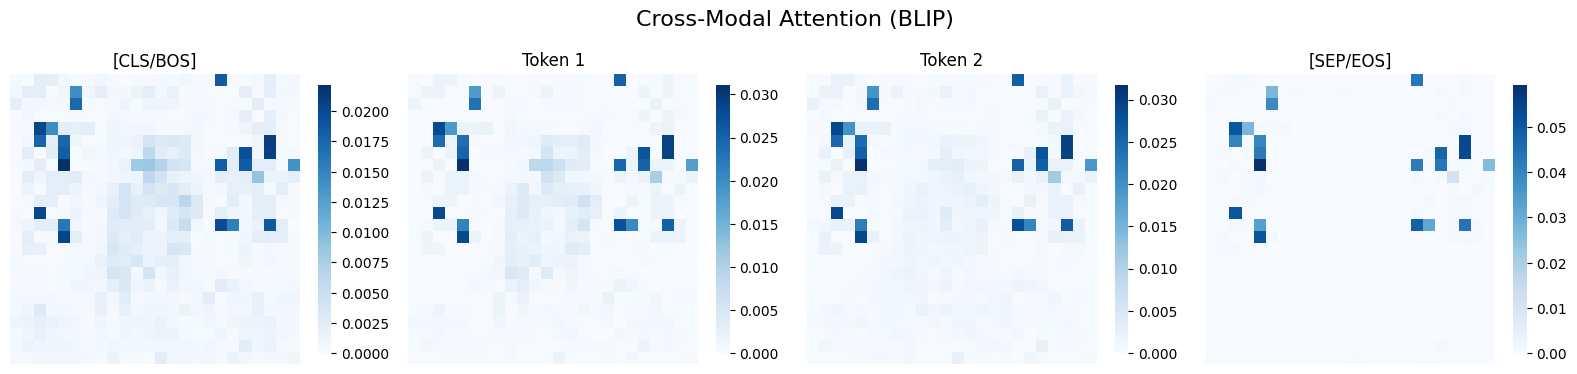

In [11]:
"""
# 💾 Export Visualizations
# Save attention visualizations for papers or presentations
"""
# Create a visualization to export
export_viz = visualizer.visualize(
    image=image,
    text="fluffy cat",
    visualization_type="heatmap",
    attention_type="cross"
)

# Export in different formats
print("Exporting visualizations...\n")

# PNG format (for papers)
export_viz.save("attention_visualization.png", dpi=300)
print("✅ Saved as PNG (300 DPI) - perfect for papers")

# PDF format (for LaTeX)
export_viz.save("attention_visualization.pdf")
print("✅ Saved as PDF - great for LaTeX documents")

# SVG format (for web)
export_viz.save("attention_visualization.svg")
print("✅ Saved as SVG - scalable for web use")

# Show file sizes
import os
for ext in ['png', 'pdf', 'svg']:
    filename = f"attention_visualization.{ext}"
    if os.path.exists(filename):
        size = os.path.getsize(filename) / 1024  # KB
        print(f"   {filename}: {size:.1f} KB")

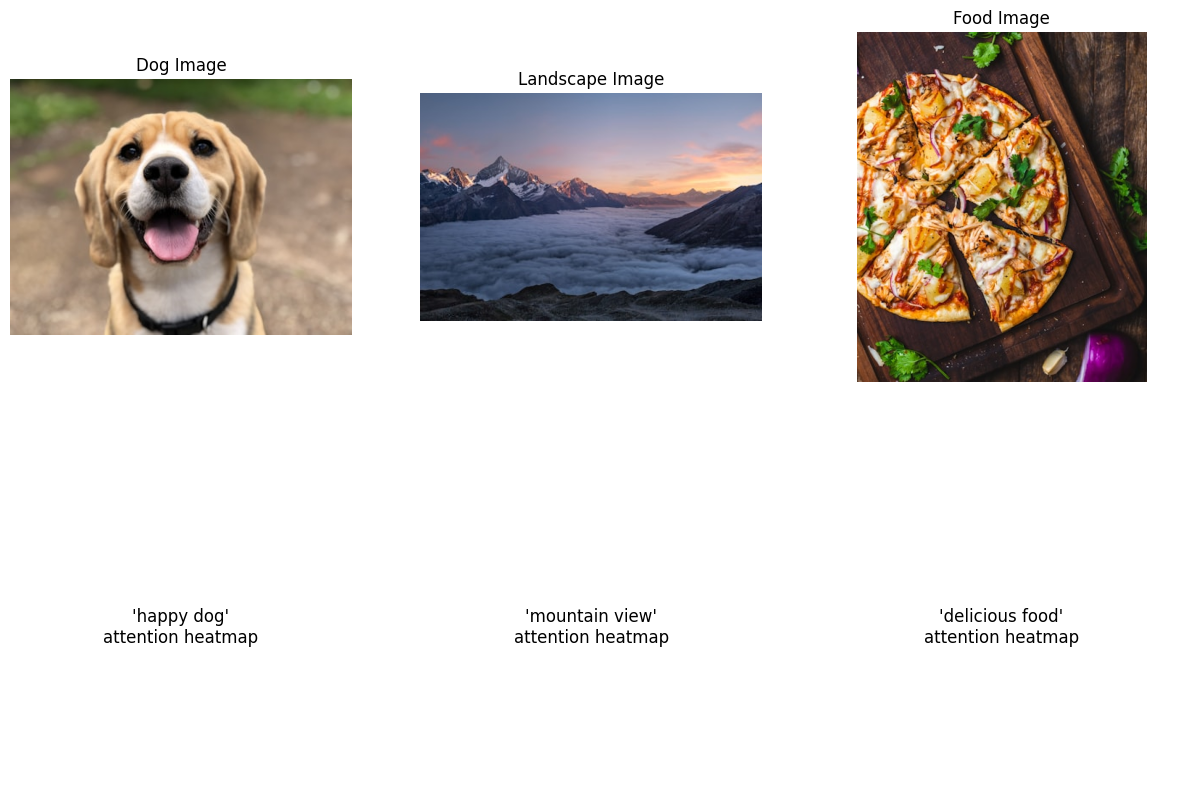

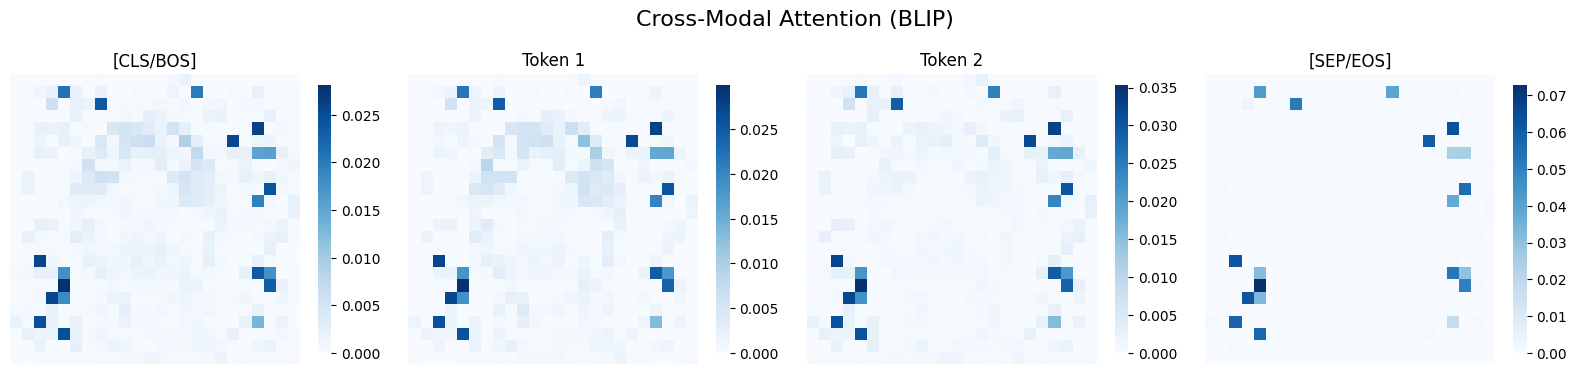

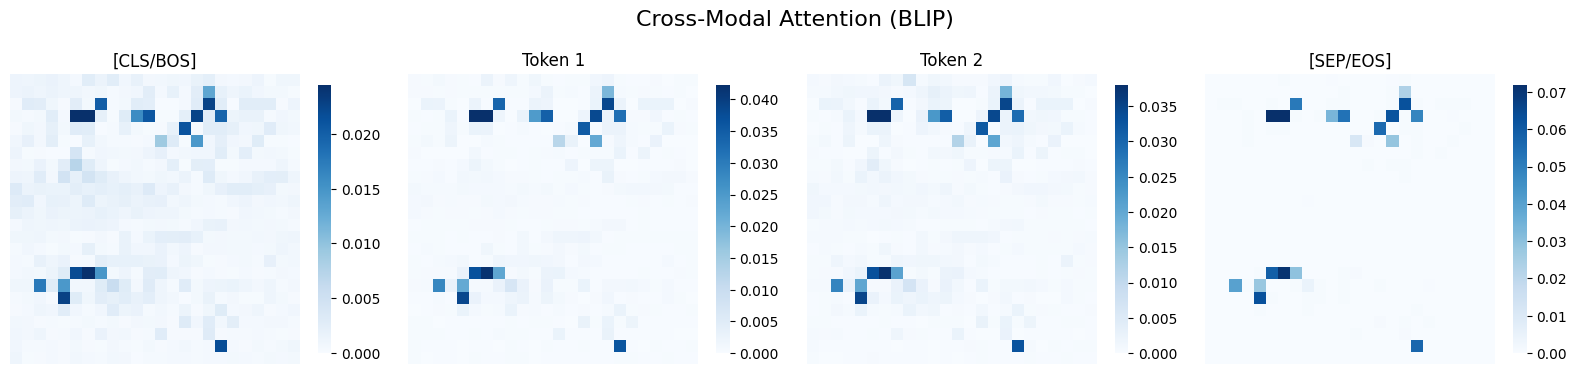

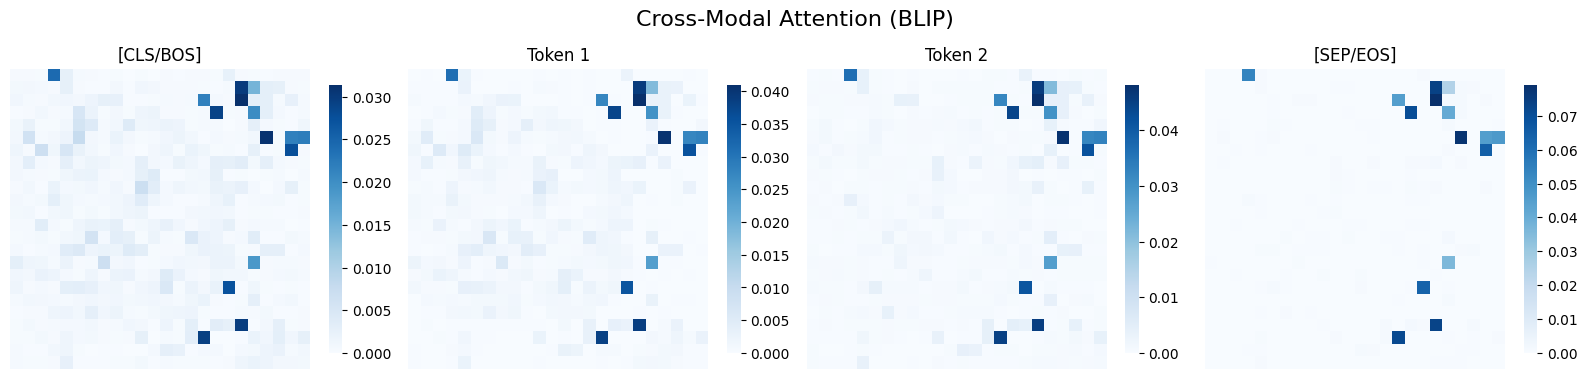

✅ The toolkit works with any type of image!


In [12]:
"""
# 🎨 Try Different Types of Images
# The toolkit works with any image type
"""
# Test with different image subjects
test_images = {
    "Dog": "https://images.unsplash.com/photo-1543466835-00a7907e9de1?w=400",
    "Landscape": "https://images.unsplash.com/photo-1506905925346-21bda4d32df4?w=400",
    "Food": "https://images.unsplash.com/photo-1565299624946-b28f40a0ae38?w=400"
}

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, (subject, url) in enumerate(test_images.items()):
    # Load image
    response = requests.get(url)
    test_image = Image.open(BytesIO(response.content))

    # Display original
    axes[0, idx].imshow(test_image)
    axes[0, idx].set_title(f"{subject} Image")
    axes[0, idx].axis('off')

    # Simple description
    descriptions = {
        "Dog": "happy dog",
        "Landscape": "mountain view",
        "Food": "delicious food"
    }

    # Generate visualization
    viz = visualizer.visualize(
        image=test_image,
        text=descriptions[subject],
        visualization_type="heatmap",
        attention_type="cross"
    )

    # For display purposes, show a placeholder
    axes[1, idx].text(0.5, 0.5, f"'{descriptions[subject]}'\nattention heatmap",
                      ha='center', va='center', fontsize=12)
    axes[1, idx].axis('off')

plt.tight_layout()
plt.show()

print("✅ The toolkit works with any type of image!")

Loading CLIP model...


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/attention_viz/core.py:46: UserWarning: Model type 'CLIP' does not support cross-modal attention. Only self-attention (text-to-text or image-to-image) can be visualized. Consider using BLIP or Flamingo for cross-modal attention visualization.
  warnings.warn(
`torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to eager attention. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


Found 24 attention modules in CLIP model
✅ CLIP model loaded

Note: CLIP doesn't have cross-modal attention.
Visualizing vision self-attention instead...



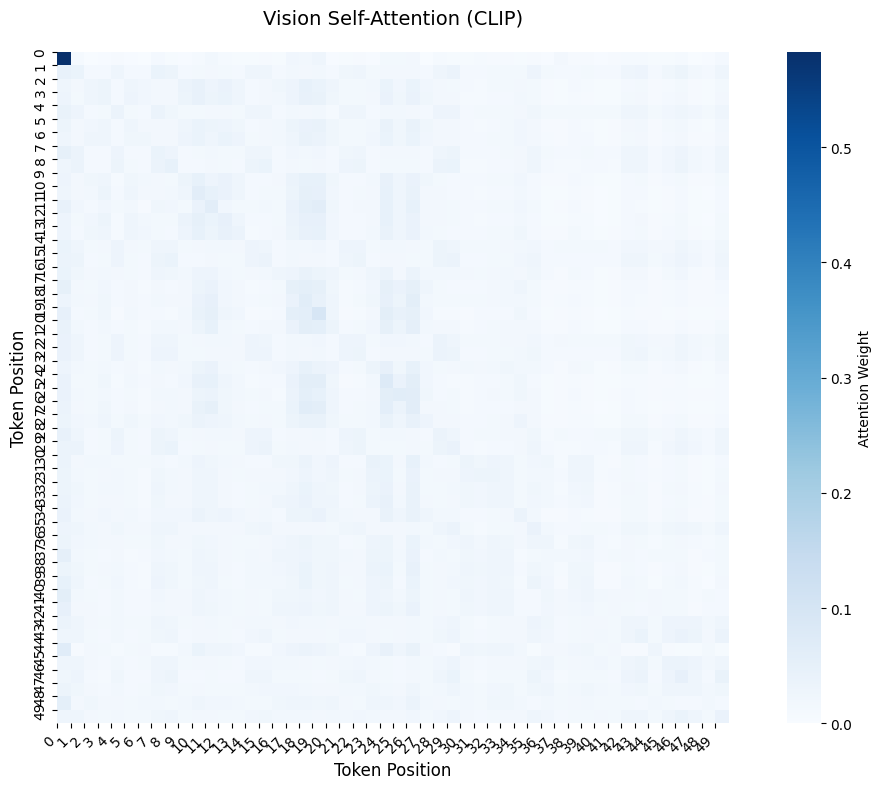


💡 This shows how image patches attend to each other in CLIP


In [13]:
"""
# 🔀 CLIP Model Compatibility
# The toolkit also supports CLIP (vision self-attention only)
"""
print("Loading CLIP model...")

# Load CLIP model
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip_visualizer = AttentionVisualizer(clip_model, clip_processor)

print("✅ CLIP model loaded")
print("\nNote: CLIP doesn't have cross-modal attention.")
print("Visualizing vision self-attention instead...\n")

# Visualize CLIP's vision self-attention
clip_viz = clip_visualizer.visualize(
    image=image,
    text="cat",
    visualization_type="heatmap",
    attention_type="vision_self"
)

clip_viz.show()

print("\n💡 This shows how image patches attend to each other in CLIP")

In [14]:
"""
# 🎯 Summary and Next Steps
"""
print("🎉 Congratulations! You've learned how to use transformers-attention-viz\n")

print("📚 What you've learned:")
print("• Visualize cross-modal attention in BLIP")
print("• Analyze attention statistics and metrics")
print("• Compare attention patterns across descriptions")
print("• Export visualizations for publications")
print("• Work with different model types (BLIP, CLIP)")

print("\n🚀 Next steps:")
print("• Try with your own images and descriptions")
print("• Explore attention patterns in your research")
print("• Use exported visualizations in papers")
print("• Contribute to the project on GitHub")

print("\n📖 Resources:")
print("• GitHub: https://github.com/sisird864/transformers-attention-viz")
print("• PyPI: https://pypi.org/project/transformers-attention-viz/")
print("• Documentation: See GitHub README")

print("\n⭐ If you find this useful, please star the GitHub repo!")

🎉 Congratulations! You've learned how to use transformers-attention-viz

📚 What you've learned:
• Visualize cross-modal attention in BLIP
• Analyze attention statistics and metrics
• Compare attention patterns across descriptions
• Export visualizations for publications
• Work with different model types (BLIP, CLIP)

🚀 Next steps:
• Try with your own images and descriptions
• Explore attention patterns in your research
• Use exported visualizations in papers
• Contribute to the project on GitHub

📖 Resources:
• GitHub: https://github.com/sisird864/transformers-attention-viz
• PyPI: https://pypi.org/project/transformers-attention-viz/
• Documentation: See GitHub README

⭐ If you find this useful, please star the GitHub repo!


In [15]:
"""
# 🖥️ Interactive Dashboard (Optional)
# For local use only - not available in Colab
"""
print("💡 Advanced Feature: Interactive Dashboard\n")

print("The package includes a Gradio-based interactive dashboard.")
print("To use it locally:\n")

print("```python")
print("from transformers_attention_viz import launch_dashboard")
print("launch_dashboard(model, processor)")
print("```")

print("\nThis provides:")
print("• Real-time attention exploration")
print("• Model switching interface")
print("• Parameter adjustment controls")
print("• Direct export functionality")

print("\n⚠️ Note: The dashboard requires a local environment (doesn't work in Colab)")

# End of notebook
"""
# 🙏 Thank You!
# We hope you find this tool useful for your research!
"""

💡 Advanced Feature: Interactive Dashboard

The package includes a Gradio-based interactive dashboard.
To use it locally:

```python
from transformers_attention_viz import launch_dashboard
launch_dashboard(model, processor)
```

This provides:
• Real-time attention exploration
• Model switching interface
• Parameter adjustment controls
• Direct export functionality

⚠️ Note: The dashboard requires a local environment (doesn't work in Colab)


'\n# 🙏 Thank You!\n# We hope you find this tool useful for your research!\n'